In [2]:
#import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance['sex'], insurance['smoker'], insurance['age']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [16]:
#let's try one-hot encoding our DataFrame
insurance_one_hot = pd.get_dummies(insurance).astype(float)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# Create X & y values (features & labels)
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [18]:
# View X
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [21]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [22]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
]
)

# 2. Compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10169.5166 - mae: 10169.5166
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7691.9893 - mae: 7691.9893
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7521.9487 - mae: 7521.9487
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7479.8047 - mae: 7479.8047
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7832.6094 - mae: 7832.6094
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7626.8945 - mae: 7626.8945
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7842.4199 - mae: 7842.4199
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7630.2827 - mae: 7630.2827
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7455.1650 - mae: 7455.1650
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7084.9219 - mae: 7084.9219
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7707.1655 - mae: 7707.1655
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [23]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7950.2446 - mae: 7950.2446  


[7910.765625, 7910.765625]

In [24]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

# Right now, the model isn't performing too well, let's improve it!

To try and improve the model, we'll run two experiements:
  1. Add an extra layer with more hidden units
  2. Train for longer

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
]
)

# 2. Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 14/100
34/34 ━━━━━━

In [29]:

print("X_train contains NaN:", np.any(np.isnan(X_train)))
print("X_train contains Inf:", np.any(np.isinf(X_train)))
print("y_train contains NaN:", np.any(np.isnan(y_train)))
print("y_train contains Inf:", np.any(np.isinf(y_train)))

X_train contains NaN: False
X_train contains Inf: False
y_train contains NaN: False
y_train contains Inf: False


In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
]
)

# 2. Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13283.6797 - mae: 13283.6797
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13118.0830 - mae: 13118.0830
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12786.7207 - mae: 12786.7207
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12140.9053 - mae: 12140.9053
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11040.0938 - mae: 11040.0938
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9580.5068 - mae: 9580.5068
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8190.8618 - mae: 8190.8618
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7469.3057 - mae: 7469.3057
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7360.3604 - mae: 7360.3604
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7334.8115 - mae: 7334.8115
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7313.1089 - mae: 7313.1089 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [31]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4737.8169 - mae: 4737.8169  


[4611.90673828125, 4611.90673828125]

In [32]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7950.2446 - mae: 7950.2446 


[7910.765625, 7910.765625]

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
]
)

# 2. Compile the model
insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13253.4590 - mae: 13253.4590
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13080.5537 - mae: 13080.5537 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12724.7490 - mae: 12724.7490 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12023.4785 - mae: 12023.4785 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10844.1787 - mae: 10844.1787 
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9350.6318 - mae: 9350.6318 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8025.0703 - mae: 8025.0703 
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7453.5625 - mae: 7453.5625 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7374.7866 - mae: 7374.7866
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7349.9839 - mae: 7349.9839 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7327.5410 - mae: 7327.5410 
Epoch 12/500
34/34 ━━━━━━━━━━━━━━

In [45]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3210.0110 - mae: 3210.0110  


[3161.977783203125, 3161.977783203125]

In [46]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4737.8169 - mae: 4737.8169 


[4611.90673828125, 4611.90673828125]

In [47]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7950.2446 - mae: 7950.2446 


[7910.765625, 7910.765625]

Text(0.5, 0, 'ephochs')

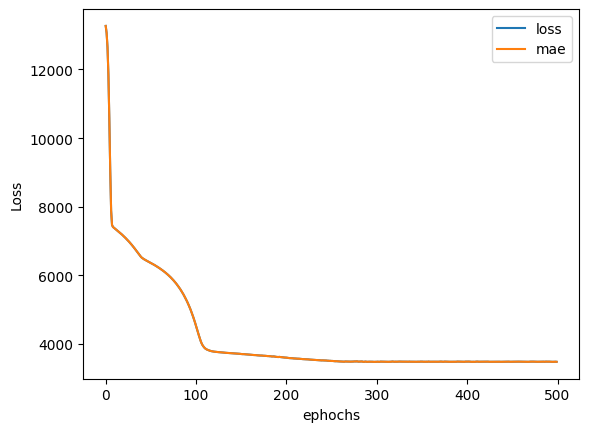

In [48]:
# Plot history

pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('ephochs')

# Let's Start Over

# Preprocessing data (Normalization & Standardization)

In [49]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: ylabel='Frequency'>

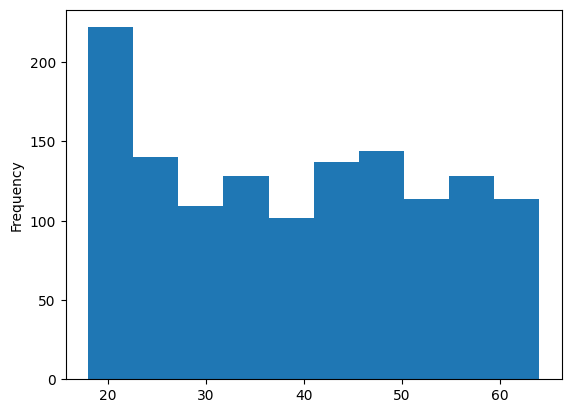

In [50]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

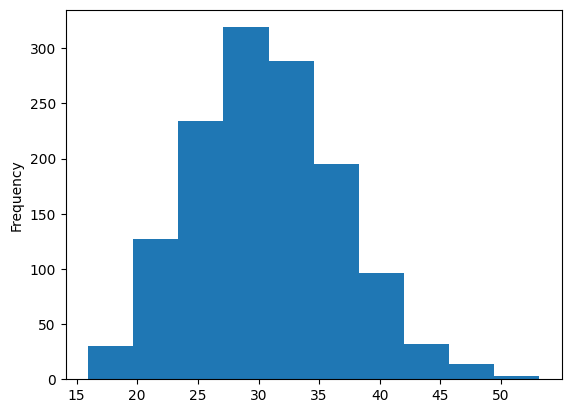

In [51]:
X['bmi'].plot(kind='hist')

In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler() , ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

# Build our train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer on the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)
X_train_normal=ct.transform(X_train)
X_test_transform = ct.transform(X_test)

In [55]:
# What does our data look like?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [59]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [60]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Now let's build a neural network model

In [67]:
import tensorflow as tf

tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')

]
)


# 2. Compile the model

insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model

history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13297.9619 - mae: 13297.9619
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13294.9863 - mae: 13294.9863 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13286.8418 - mae: 13286.8418 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13268.1396 - mae: 13268.1396
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13234.0439 - mae: 13234.0439 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13179.3662 - mae: 13179.3662 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13098.5010 - mae: 13098.5010 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12985.9824 - mae: 12985.9824
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12836.1152 - mae: 12836.1152 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12642.3418 - mae: 12642.3418
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12400.5840 - mae: 12400.5840
Epoch 12/200
34/34 ━━━━━

In [68]:
insurance_model_4.evaluate(X_test_transform, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2965.4231 - mae: 2965.4231  


[2859.861328125, 2859.861328125]

Text(0.5, 0, 'ephochs')

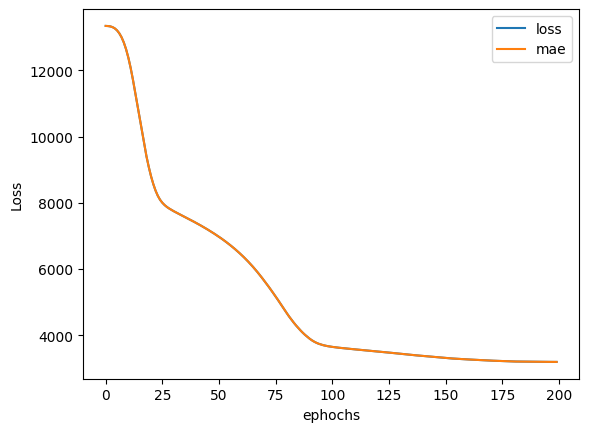

In [71]:
# Plot history

pd.DataFrame(history_4.history).plot()
plt.ylabel('Loss')
plt.xlabel('ephochs')